      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

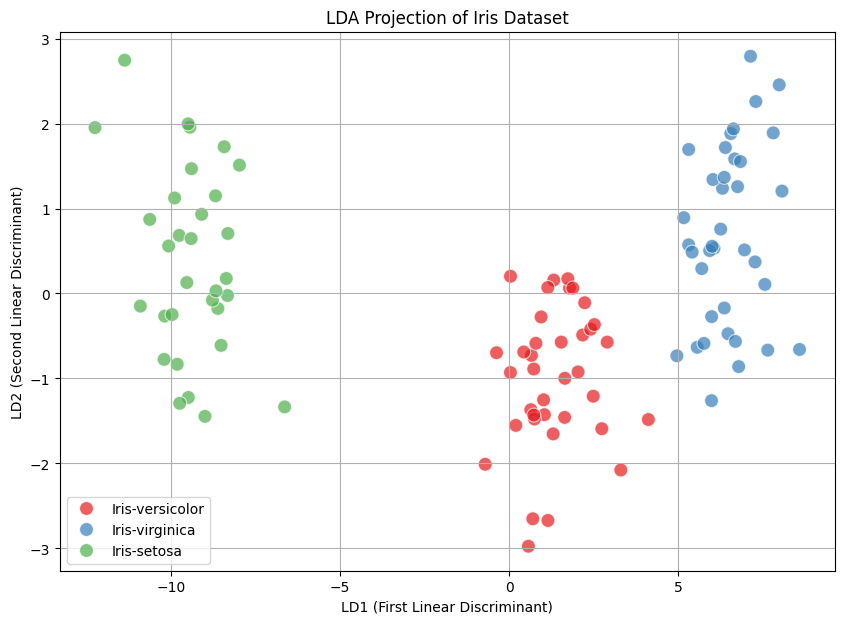

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

df=pd.read_csv("IRIS.csv")

print(df)

# Step 3: Separate features and target variable
X = df.drop(columns=['Species'])  # Features (sepal length, sepal width, petal length, petal width)
y = df['Species']  # Target variable (Species)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply LDA
lda = LDA(n_components=2)  # Reduce the data to 2 dimensions for visualization
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Step 7: Train a classifier (Logistic Regression) on the LDA-transformed data
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Step 8: Predict on the test set
y_pred = classifier.predict(X_test_lda)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the LDA model: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Visualize the LDA results
import matplotlib.pyplot as plt
import seaborn as sns

# Add the LDA transformed data to a DataFrame for easy plotting
lda_train_df = pd.DataFrame(X_train_lda, columns=['LD1', 'LD2'])
lda_train_df['species'] = y_train.values

# Plot the LDA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='LD1', y='LD2', hue='species', data=lda_train_df, palette='Set1', s=100, alpha=0.7)
plt.title('LDA Projection of Iris Dataset')
plt.xlabel('LD1 (First Linear Discriminant)')
plt.ylabel('LD2 (Second Linear Discriminant)')
plt.legend(loc='best')
plt.grid(True)
plt.show()
